In [27]:
!pip install seaborn

In [28]:
# Hücre 1: Kütüphaneler ve veri yükleme

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
# ==============================
# 1) CSV Okuma
# ==============================
# !!Dosya adını bilgisayarınıza göre ayarlayabilirsiniz
input_path = "/Users/berkebilgin/Desktop/VSCODE/Python/470/dataset.csv"          
output_path = "/Users/berkebilgin/Desktop/VSCODE/Python/470/dataset_clean.csv"  

# Büyük dosyalarda warning'leri azaltmak için low_memory=False iyi olur
df = pd.read_csv(input_path, low_memory=False)

print("=== Orijinal Veri Bilgisi ===")
print(f"Toplam satır sayısı: {df.shape[0]}")
if 'popularity' not in df.columns:
    raise ValueError("'popularity' sütunu bulunamadı! Kolon isimlerini kontrol edin.")

zero_pop_count = (df['popularity'] == 0).sum()
print(f"Popülaritesi 0 olan satır sayısı: {zero_pop_count}")
print(f"Oran: {zero_pop_count / df.shape[0]:.4f}\n")

# track_name kolonu var mı kontrol edelim
if 'track_name' not in df.columns:
    raise ValueError("'track_name' sütunu bulunamadı! Kolon isimlerini kontrol edin.")


# ==============================
# 2) Aynı şarkı isminde sadece en popüler olanı tutuyoruz.
# ==============================
print("Aynı track_name'e sahip kopyaları temizliyorum (en yüksek popularity olanı tutarak)...")

# Popularity'e göre büyükten küçüğe sıralıyoruz.
df = df.sort_values('popularity', ascending=False)

# Aynı isimli şarkılardan sadece ilkini (en popüler olanı) tutuyoruz
df = df.drop_duplicates(subset='track_name', keep='first')

print("\n=== Duplicate Temizliği Sonrası ===")
print(f"Kalan satır sayısı: {df.shape[0]}")
zero_pop_count = (df['popularity'] == 0).sum()
print(f"Popülaritesi 0 olan satır sayısı: {zero_pop_count}")
print(f"Oran: {zero_pop_count / df.shape[0]:.4f}\n")


# ==============================
# 3) Tüm şarkıları 0 olan artist'leri sil (dead artists). Bu sayede gereksiz dataları silmiş oluyoruz
# ==============================
if 'artists' not in df.columns:
    print("Uyarı: 'artists' sütunu yok, dead artist temizliği atlanıyor.")
else:
    print("Tüm şarkıları popularity=0 olan artist'leri tespit ediyorum...")

    # Her artist için ortalama popülerlik
    artist_pop = df.groupby('artists')['popularity'].mean().reset_index()

    # Ortalama popülerliği 0 olan artistler
    dead_artists = artist_pop[artist_pop['popularity'] == 0]['artists']
    print(f"Tamamen 'ölü' (ortalama popularity=0) artist sayısı: {dead_artists.shape[0]}")

    # Bu artistlerin tüm şarkılarını veriden çıkar
    df = df[~df['artists'].isin(dead_artists)]

    print("\n=== Dead Artist Temizliği Sonrası ===")
    print(f"Kalan satır sayısı: {df.shape[0]}")
    zero_pop_count = (df['popularity'] == 0).sum()
    print(f"Popülaritesi 0 olan satır sayısı: {zero_pop_count}")
    print(f"Oran: {zero_pop_count / df.shape[0]:.4f}\n")


# ==============================
# 4) Kalan tüm 0'ları silmek istersek ilerde bu şekilde hepsini hızlıca kaldırabiliriz. Başında '#' işaretini silmemiz yeterli. Şu an silmememizin doğru olduğunu düşünüyoruz.
# ==============================

# df = df[df['popularity'] > 0]


# ==============================
# 5) Temizlenmiş veriyi kaydetme aşaması
# ==============================
df.to_csv(output_path, index=False)
print(f"Temizlenmiş veri '{output_path}' dosyasına kaydedildi.")


=== Orijinal Veri Bilgisi ===
Toplam satır sayısı: 114000
Popülaritesi 0 olan satır sayısı: 16020
Oran: 0.1405

Aynı track_name'e sahip kopyaları temizliyorum (en yüksek popularity olanı tutarak)...

=== Duplicate Temizliği Sonrası ===
Kalan satır sayısı: 73609
Popülaritesi 0 olan satır sayısı: 4008
Oran: 0.0544

Tüm şarkıları popularity=0 olan artist'leri tespit ediyorum...
Tamamen 'ölü' (ortalama popularity=0) artist sayısı: 1408

=== Dead Artist Temizliği Sonrası ===
Kalan satır sayısı: 71493
Popülaritesi 0 olan satır sayısı: 1892
Oran: 0.0265

Temizlenmiş veri '/Users/berkebilgin/Desktop/VSCODE/Python/470/dataset_clean.csv' dosyasına kaydedildi.


In [30]:
# Grafik ayarları
plt.style.use("default")
plt.rcParams["figure.figsize"] = (10, 6)

# Temiz veri setinin yolu
DATA_PATH = "/Users/berkebilgin/Desktop/VSCODE/Python/470/dataset_clean.csv"   

# Veriyi okuma
df = pd.read_csv(DATA_PATH, low_memory=False)

print("=== Temiz Veri Boyutu (satır, sütun) ===")
print(df.shape)

print("\n=== İlk 5 Satır ===")
display(df.head())

print("\n=== Sütun Türleri ===")
print(df.dtypes)

print("\n=== Eksik Değer Sayıları ===")
missing_counts = df.isnull().sum().sort_values(ascending=False)
display(missing_counts)

=== Temiz Veri Boyutu (satır, sütun) ===
(71493, 21)

=== İlk 5 Satır ===


Unnamed: 0                track_id                     artists  \
0       20001  3nqQXoyQOWXiESFLlDF1hG        Sam Smith;Kim Petras   
1       51664  2tTmW7RDtMQtBk7m2rYeSw            Bizarrap;Quevedo   
2       81210  4uUG5RXrOk84mYEfFvj3cK     David Guetta;Bebe Rexha   
3       89411  5ww2BF9slyYgNOk37BlC4u               Manuel Turizo   
4       68305  6Sq7ltF9Qa7SNFBsV5Cogx  Bad Bunny;Chencho Corleone   

                              album_name  \
0              Unholy (feat. Kim Petras)   
1  Quevedo: Bzrp Music Sessions, Vol. 52   
2                        I'm Good (Blue)   
3                             La Bachata   
4                       Un Verano Sin Ti   

                              track_name  popularity  duration_ms  explicit  \
0              Unholy (feat. Kim Petras)         100       156943     False   
1  Quevedo: Bzrp Music Sessions, Vol. 52          99       198937     False   
2                        I'm Good (Blue)          98       175238      True   
3                             La Bachata          98       162637     False   
4                        Me Porto Bonito          97       178567      True   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.714   0.472  ...    -7.375     1       0.0864       0.01300   
1         0.621   0.782  ...    -5.548     1       0.0440       0.01250   
2         0.561   0.965  ...    -3.673     0       0.0343       0.00383   
3         0.835   0.679  ...    -5.329     0       0.0364       0.58300   
4         0.911   0.712  ...    -5.105     0       0.0817       0.09010   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000005    0.2660    0.238  131.121               4        dance  
1          0.033000    0.2300    0.550  128.033               4      hip-hop  
2          0.000007    0.3710    0.304  128.040               4          pop  
3          0.000002    0.2180    0.850  124.980               4    reggaeton  
4          0.000027    0.0933    0.425   92.005               4       latino  

[5 rows x 21 columns]


=== Sütun Türleri ===
Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

=== Eksik Değer Sayıları ===


artists             1
album_name          1
track_name          1
Unnamed: 0          0
mode                0
time_signature      0
tempo               0
valence             0
liveness            0
instrumentalness    0
acousticness        0
speechiness         0
key                 0
loudness            0
track_id            0
energy              0
danceability        0
explicit            0
duration_ms         0
popularity          0
track_genre         0
dtype: int64

=== Popularity Temel İstatistikler ===


count    71493.000000
mean        36.724672
std         18.649047
min          0.000000
25%         22.000000
50%         37.000000
75%         50.000000
max        100.000000
Name: popularity, dtype: float64

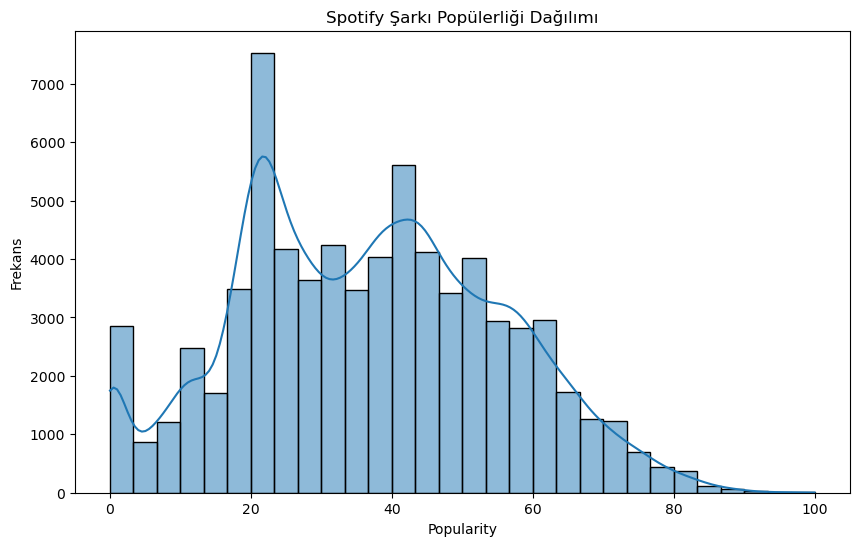

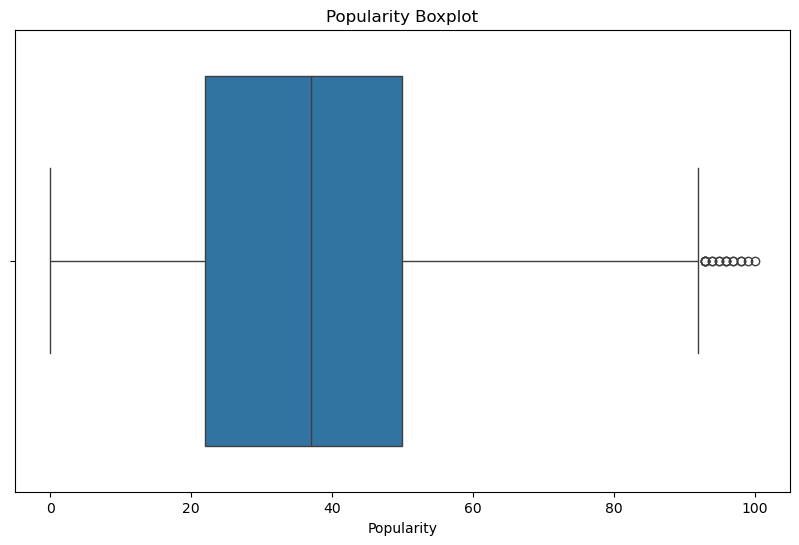

In [31]:
# Hücre 2: Hedef değişken (popularity) dağılımı

if "popularity" not in df.columns:
    raise ValueError("'popularity' sütunu bulunamadı!")

print("=== Popularity Temel İstatistikler ===")
display(df["popularity"].describe())

plt.figure()
sns.histplot(df["popularity"], bins=30, kde=True)
plt.title("Spotify Şarkı Popülerliği Dağılımı")
plt.xlabel("Popularity")
plt.ylabel("Frekans")
plt.show()

plt.figure()
sns.boxplot(x=df["popularity"])
plt.title("Popularity Boxplot")
plt.xlabel("Popularity")
plt.show()


=== danceability ===


count    71493.000000
mean         0.560153
std          0.176903
min          0.000000
25%          0.449000
50%          0.574000
75%          0.690000
max          0.985000
Name: danceability, dtype: float64

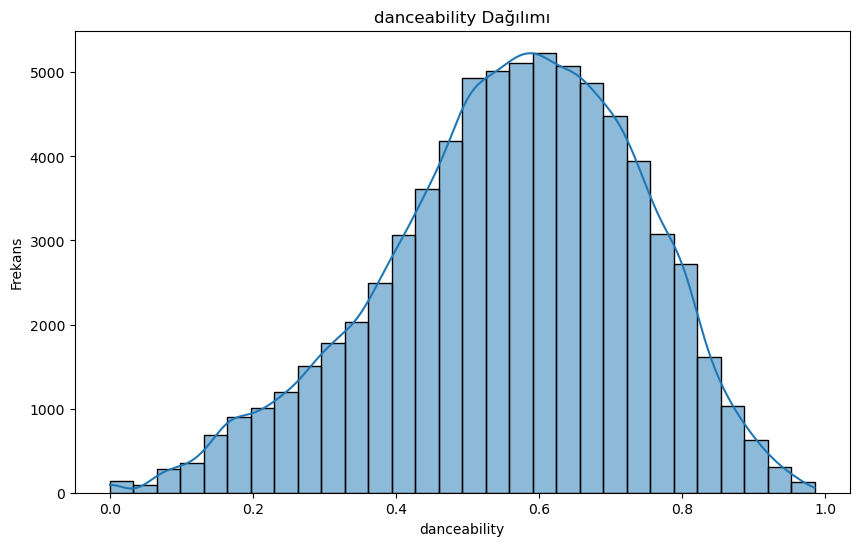

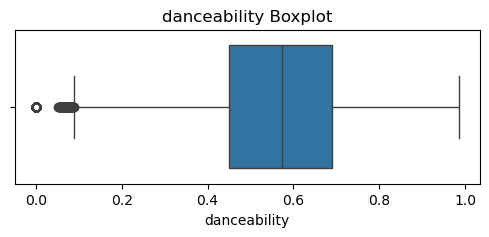

=== energy ===


count    71493.000000
mean         0.640521
std          0.255769
min          0.000000
25%          0.464000
50%          0.682000
75%          0.859000
max          1.000000
Name: energy, dtype: float64

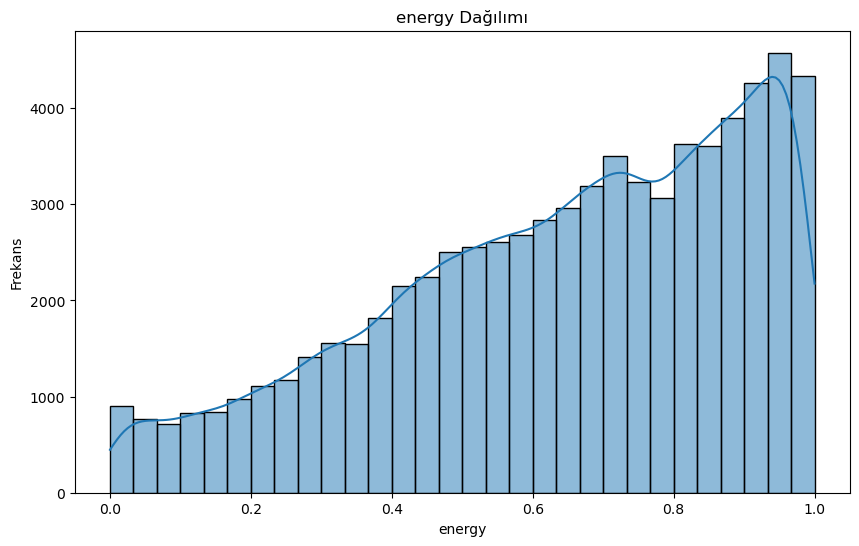

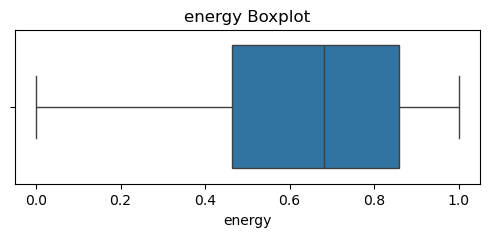

=== valence ===


count    71493.000000
mean         0.469446
std          0.263208
min          0.000000
25%          0.250000
50%          0.457000
75%          0.682000
max          0.995000
Name: valence, dtype: float64

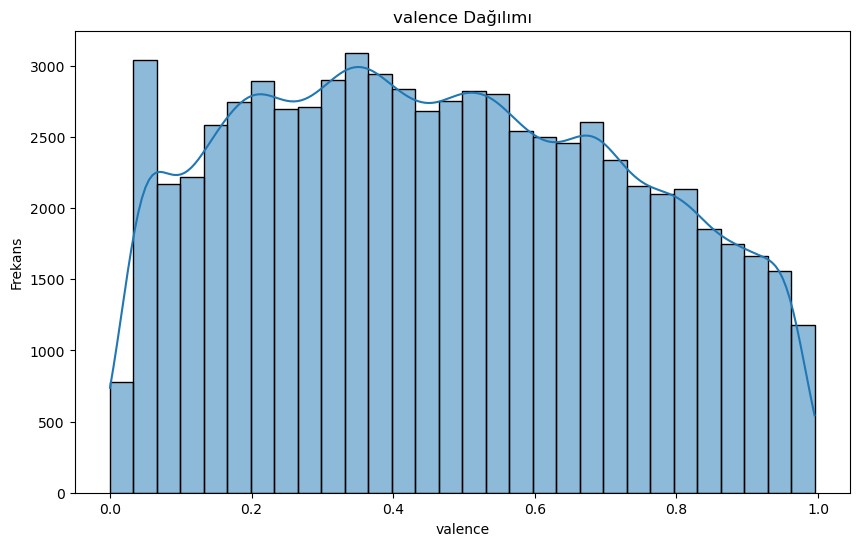

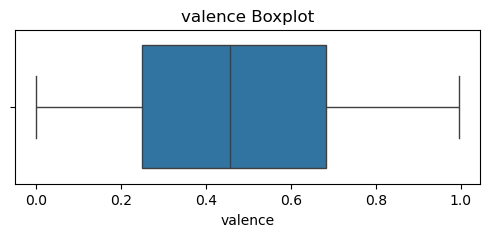

=== tempo ===


count    71493.000000
mean       122.288119
std         30.137355
min          0.000000
25%         99.475000
50%        122.111000
75%        140.485000
max        243.372000
Name: tempo, dtype: float64

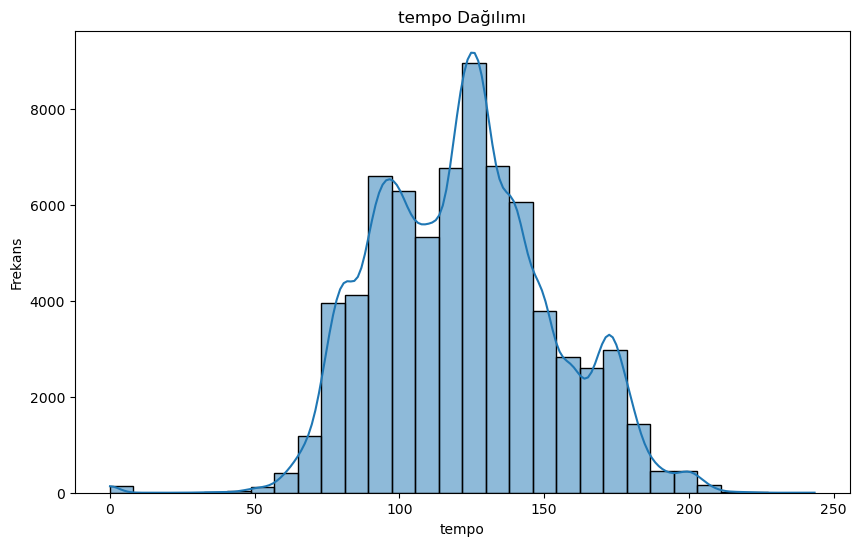

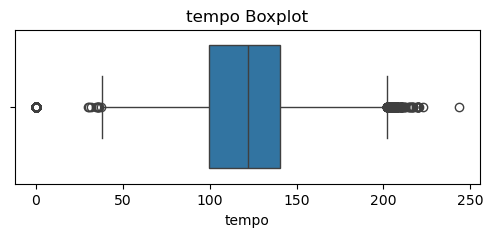

=== loudness ===


count    71493.000000
mean        -8.516174
std          5.215860
min        -49.531000
25%        -10.350000
50%         -7.234000
75%         -5.132000
max          4.532000
Name: loudness, dtype: float64

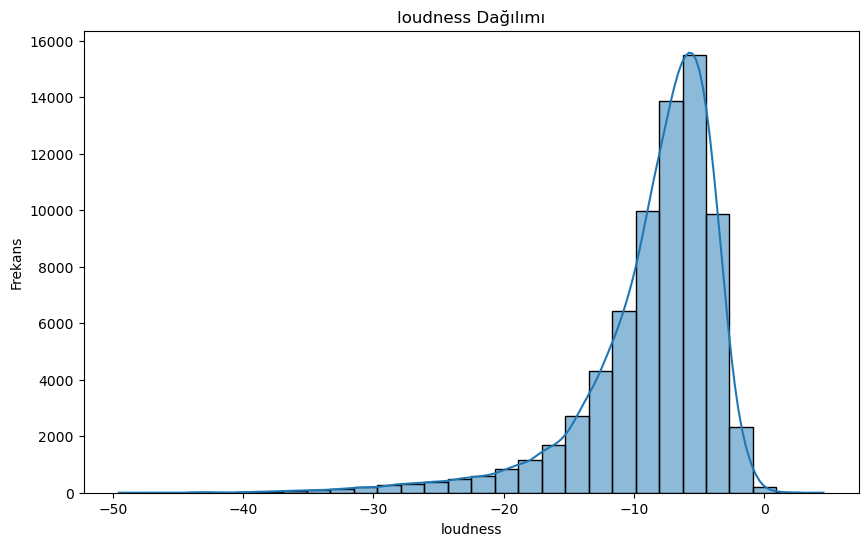

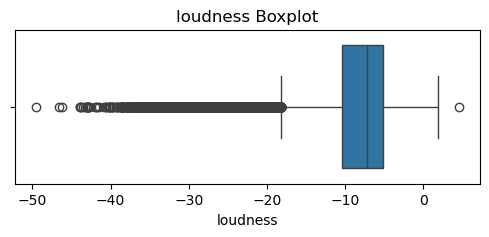

=== acousticness ===


count    71493.000000
mean         0.326204
std          0.336117
min          0.000000
25%          0.015800
50%          0.189000
75%          0.619000
max          0.996000
Name: acousticness, dtype: float64

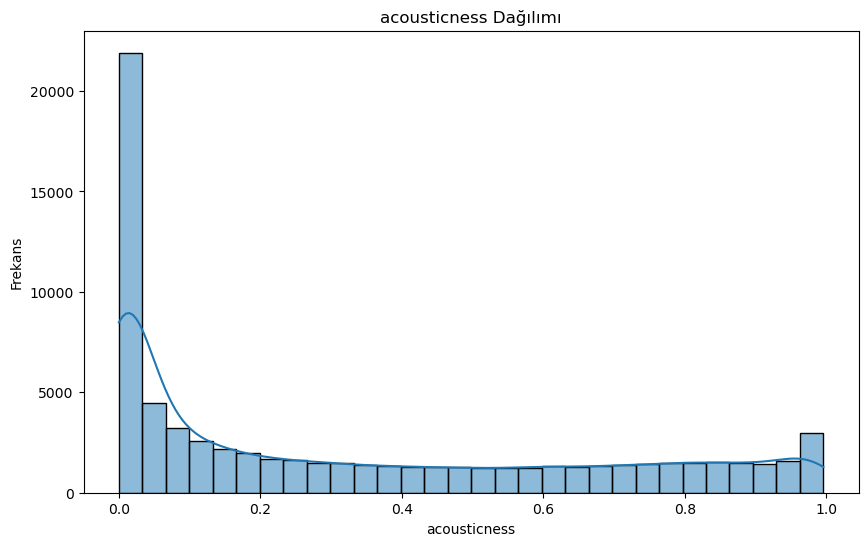

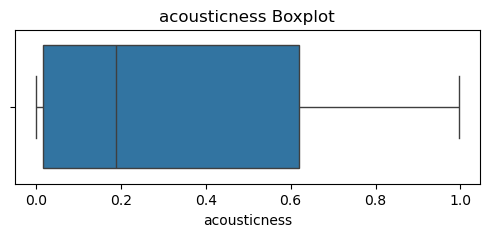

=== instrumentalness ===


count    71493.000000
mean         0.179792
std          0.328332
min          0.000000
25%          0.000000
50%          0.000073
75%          0.125000
max          1.000000
Name: instrumentalness, dtype: float64

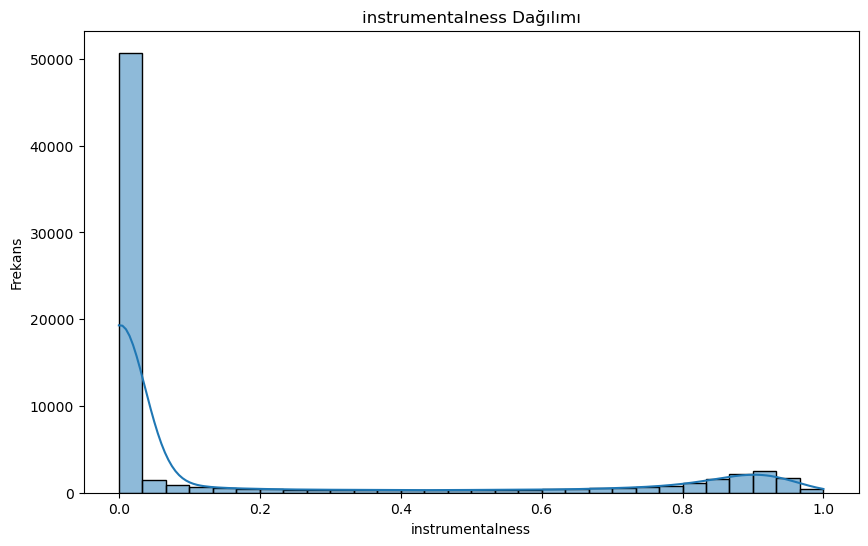

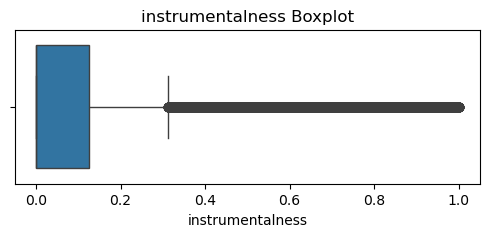

=== speechiness ===


count    71493.000000
mean         0.090328
std          0.119471
min          0.000000
25%          0.036100
50%          0.049400
75%          0.088500
max          0.965000
Name: speechiness, dtype: float64

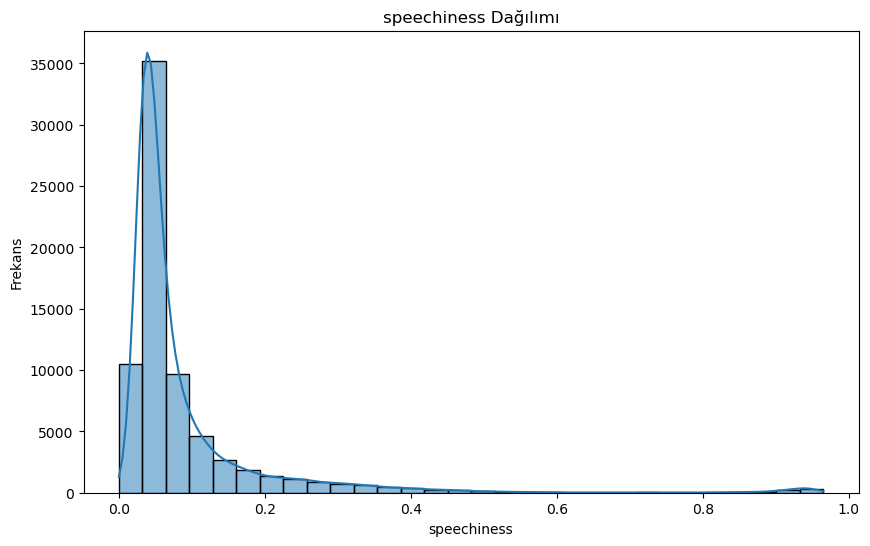

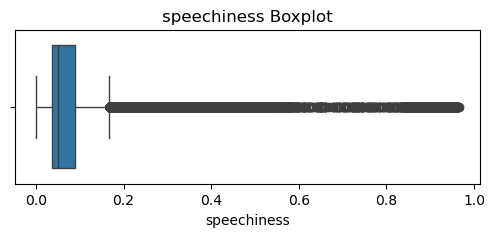

=== liveness ===


count    71493.000000
mean         0.223530
std          0.202242
min          0.000000
25%          0.098800
50%          0.135000
75%          0.289000
max          1.000000
Name: liveness, dtype: float64

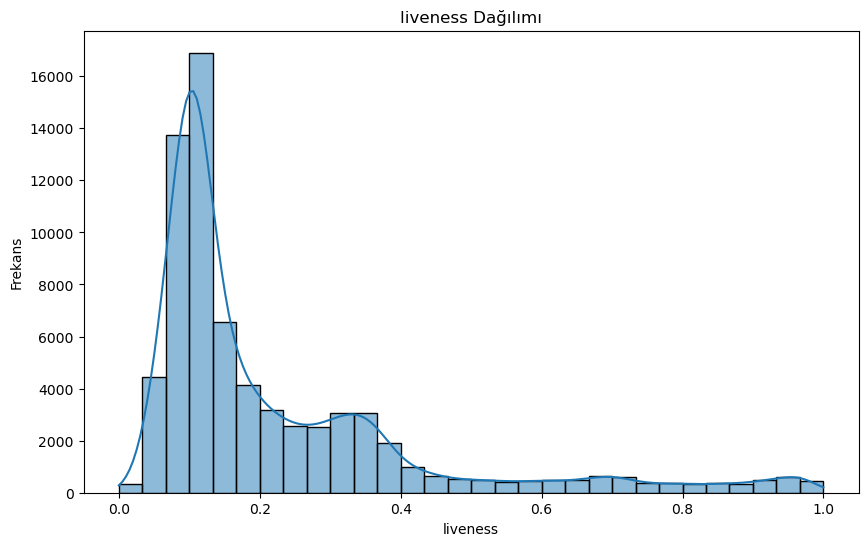

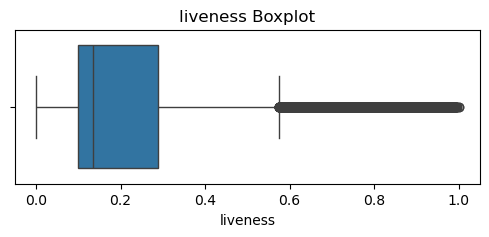

In [32]:
# Hücre 3: Önemli sayısal özelliklerin dağılımları

numeric_cols_to_plot = [
    "danceability", "energy", "valence", "tempo",
    "loudness", "acousticness", "instrumentalness",
    "speechiness", "liveness"
]

numeric_cols_to_plot = [c for c in numeric_cols_to_plot if c in df.columns]

for col in numeric_cols_to_plot:
    print(f"=== {col} ===")
    display(df[col].describe())
    plt.figure()
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"{col} Dağılımı")
    plt.xlabel(col)
    plt.ylabel("Frekans")
    plt.show()

    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f"{col} Boxplot")
    plt.xlabel(col)
    plt.show()


=== Popularity ile Korelasyonlar (yüksekten düşüğe) ===


popularity          1.000000
danceability        0.092412
loudness            0.082991
Unnamed: 0          0.068157
time_signature      0.039672
valence             0.015816
key                 0.003357
mode               -0.007209
tempo              -0.012172
energy             -0.021960
acousticness       -0.023408
liveness           -0.050756
duration_ms        -0.056489
speechiness        -0.082118
instrumentalness   -0.195112
Name: popularity, dtype: float64

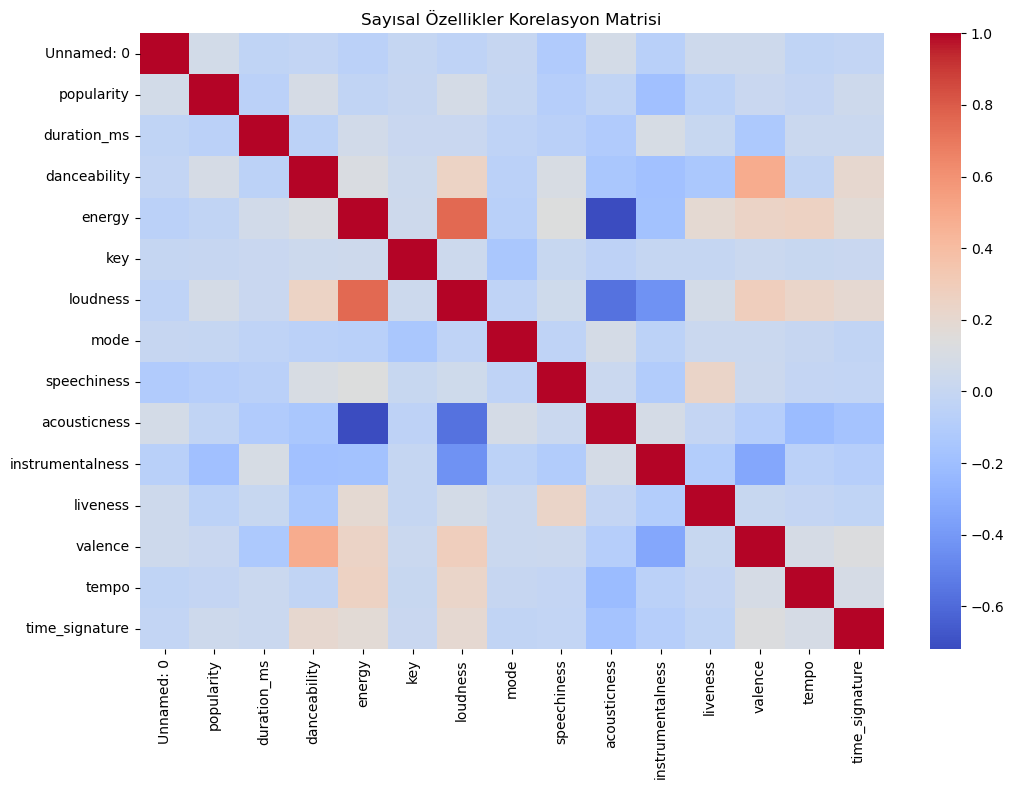

In [33]:
# Hücre 4: Korelasyon matrisi ve popularity ile ilişkiler

numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

# Popularity ile korelasyonları büyükten küçüğe sırala
if "popularity" in corr.columns:
    corr_pop = corr["popularity"].sort_values(ascending=False)
    print("=== Popularity ile Korelasyonlar (yüksekten düşüğe) ===")
    display(corr_pop)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Sayısal Özellikler Korelasyon Matrisi")
plt.show()

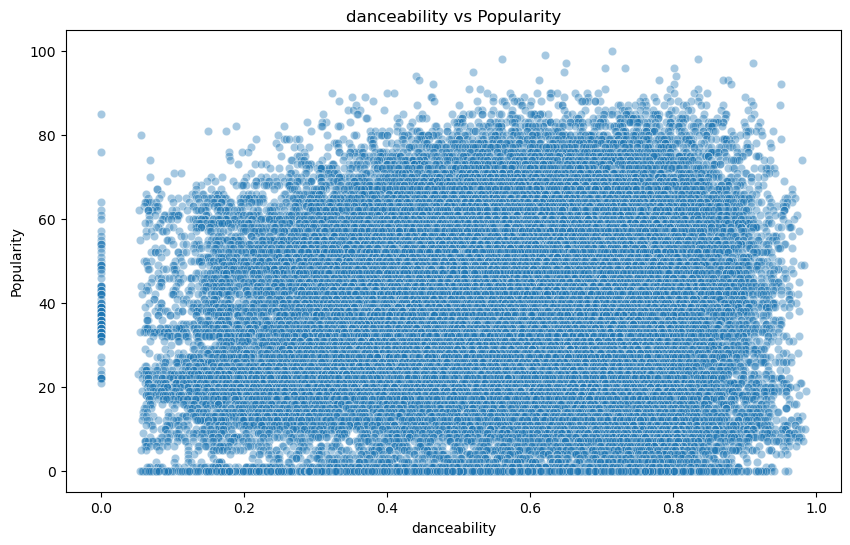

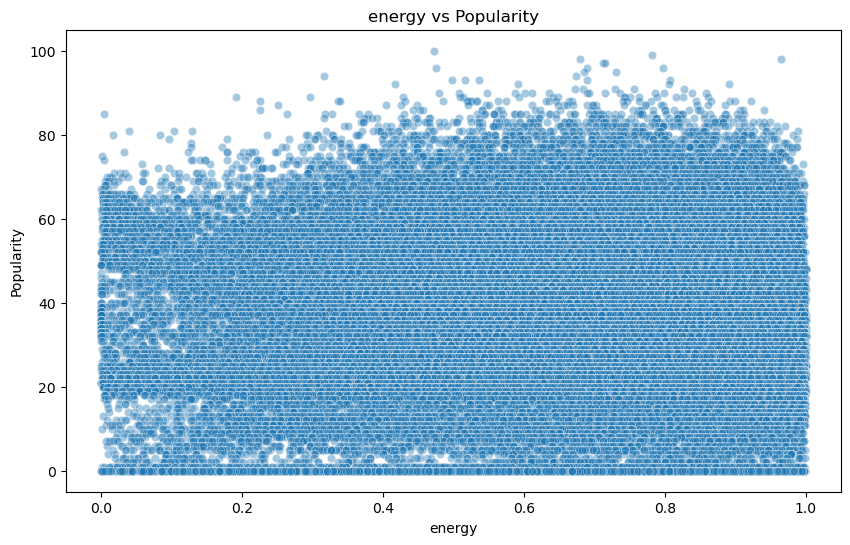

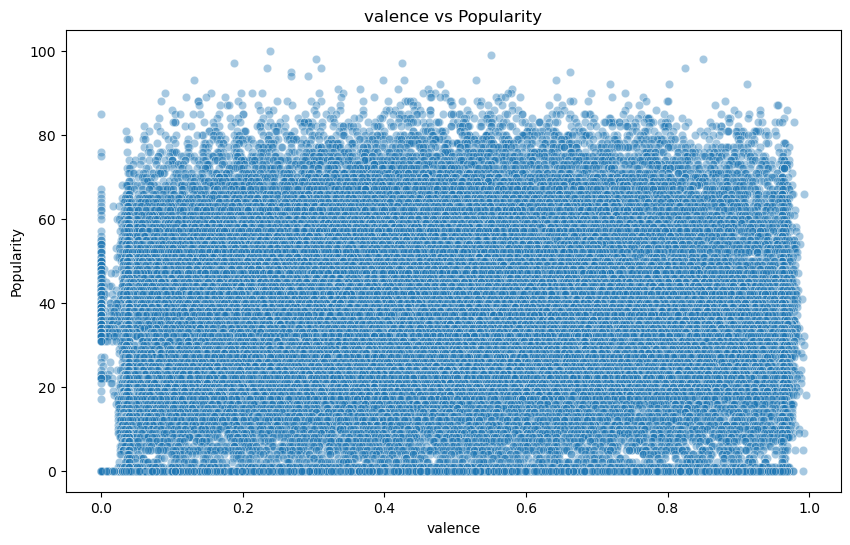

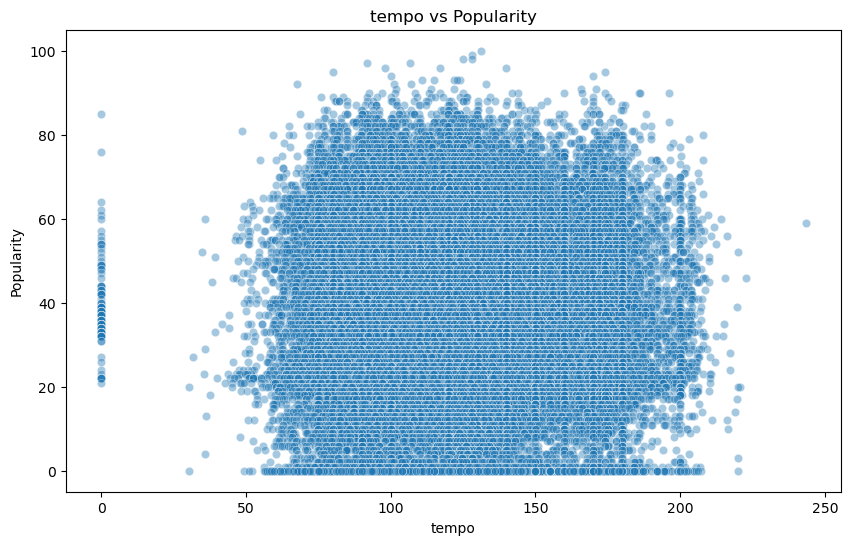

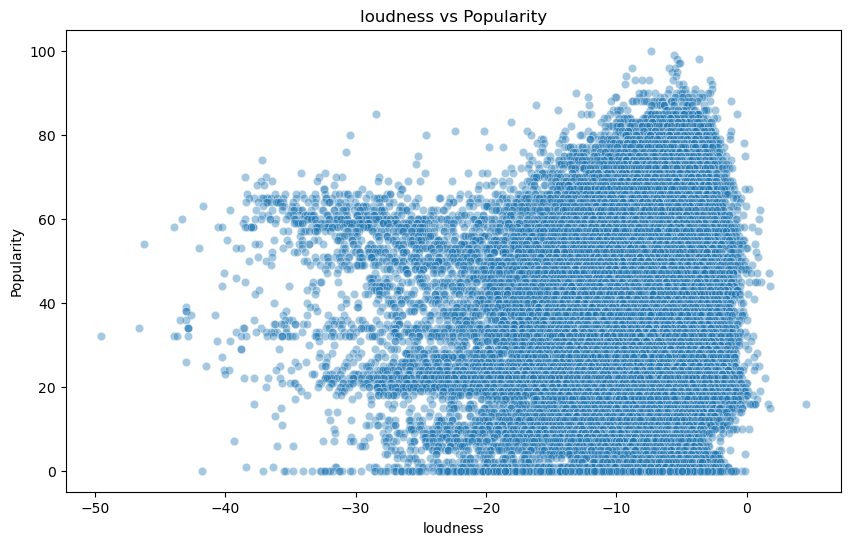

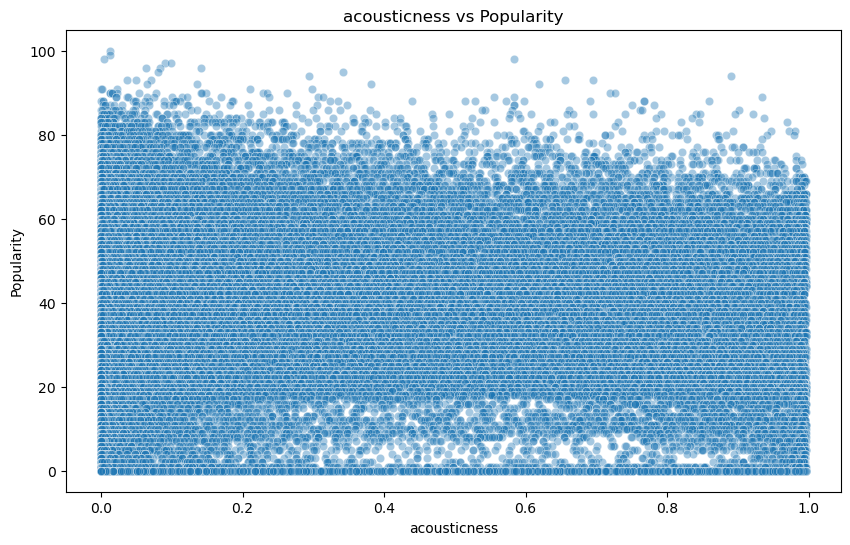

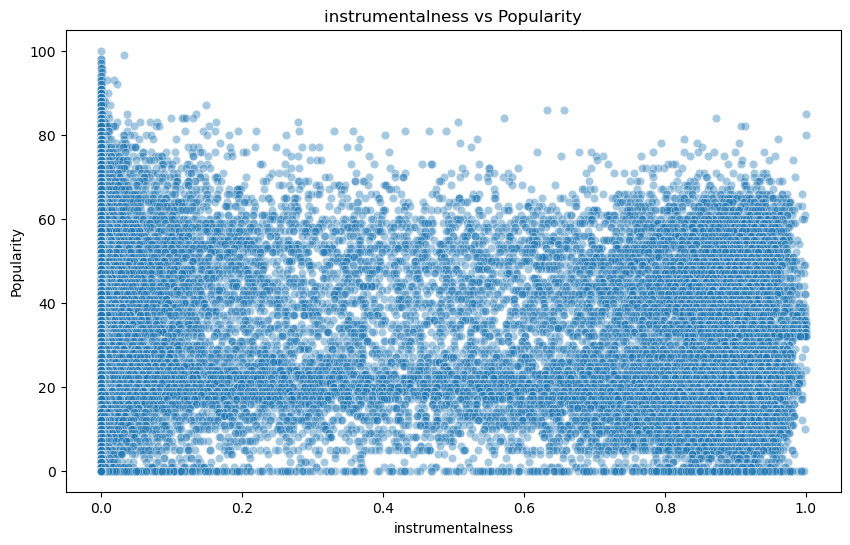

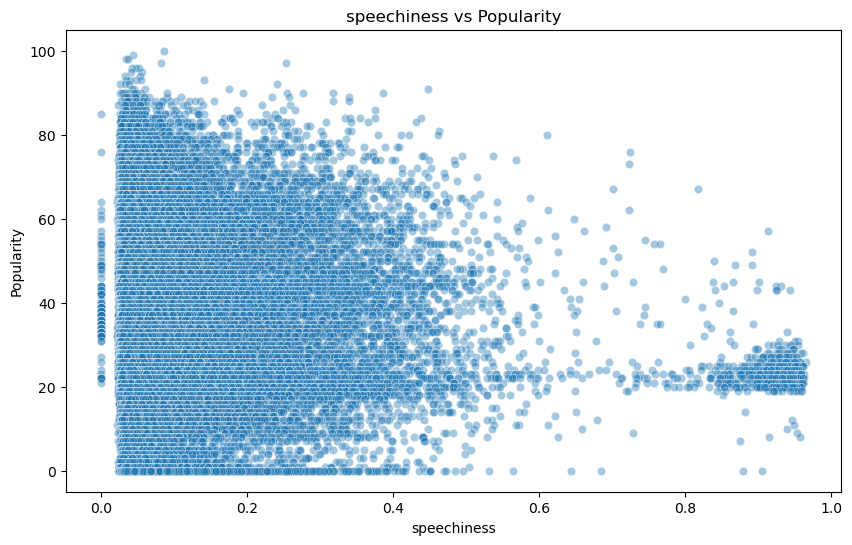

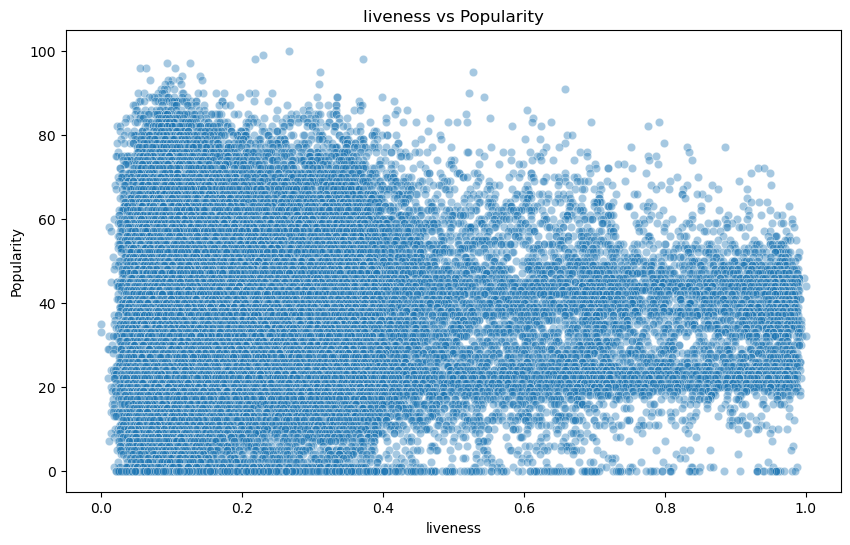

In [34]:
# Hücre 5: Bazı özelliklerin popularity ile ilişkisi (scatter plot)

features_to_check = [
    "danceability", "energy", "valence", "tempo",
    "loudness", "acousticness", "instrumentalness",
    "speechiness", "liveness"
]

features_to_check = [c for c in features_to_check if c in df.columns]

for col in features_to_check:
    plt.figure()
    sns.scatterplot(data=df, x=col, y="popularity", alpha=0.4)
    plt.title(f"{col} vs Popularity")
    plt.xlabel(col)
    plt.ylabel("Popularity")
    plt.show()


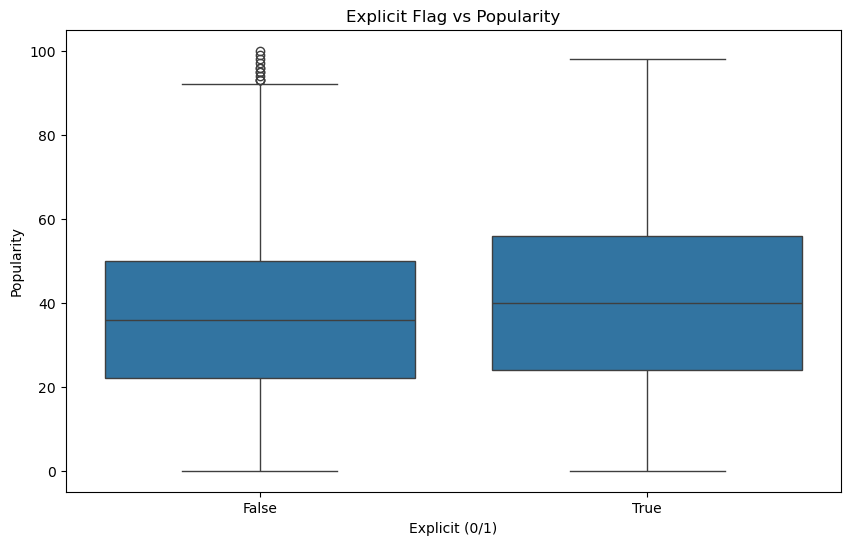

In [35]:
# Hücre 6: Kategorik değişkenler ve popularity

# explicit varsa
if "explicit" in df.columns:
    plt.figure()
    sns.boxplot(data=df, x="explicit", y="popularity")
    plt.title("Explicit Flag vs Popularity")
    plt.xlabel("Explicit (0/1)")
    plt.ylabel("Popularity")
    plt.show()

# genre varsa, en sık 10 genre için popularity dağılımı
if "genre" in df.columns:
    top_genres = df["genre"].value_counts().head(10).index
    df_top_genre = df[df["genre"].isin(top_genres)]

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_top_genre, x="genre", y="popularity")
    plt.title("En Sık 10 Genre için Popularity Dağılımı")
    plt.xlabel("Genre")
    plt.ylabel("Popularity")
    plt.xticks(rotation=45, ha="right")
    plt.show()
